In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bw files/spam_assassin.csv')


In [4]:
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [5]:
df.isnull().sum()

,0
text,0
target,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [7]:
df['target'].value_counts()

,count
target,
0,3900
1,1896


<Axes: xlabel='target', ylabel='count'>

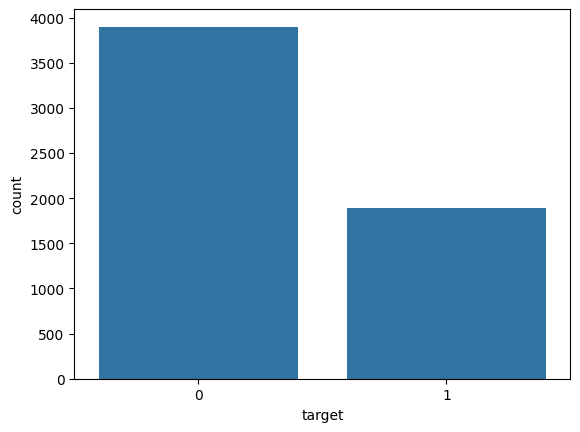

In [8]:
sns.countplot(data = df, x = 'target')

In [9]:
X = df['text']
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# Convert Text Data Into Numeric Data Using TFIDF with removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english')
tv.fit(X_train)

TfidfVectorizer(stop_words='english')

In [12]:
X_train_tfidf = tv.transform(X_train)
X_test_tfidf = tv.transform(X_test)

In [13]:
X_train_tfidf

<4057x94333 sparse matrix of type '<class 'numpy.float64'>'
	with 864608 stored elements in Compressed Sparse Row format>

In [14]:
X_test_tfidf

<1739x94333 sparse matrix of type '<class 'numpy.float64'>'
	with 342216 stored elements in Compressed Sparse Row format>

In [15]:
# Train Naive Bayes Multinomial Model on Training Data Set
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [16]:
preds = nb.predict(X_test_tfidf)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1176
           1       1.00      0.76      0.86       563

    accuracy                           0.92      1739
   macro avg       0.95      0.88      0.90      1739
weighted avg       0.93      0.92      0.92      1739



In [18]:
cm = confusion_matrix(y_test, preds)
cm

array([[1175,    1],
       [ 135,  428]])

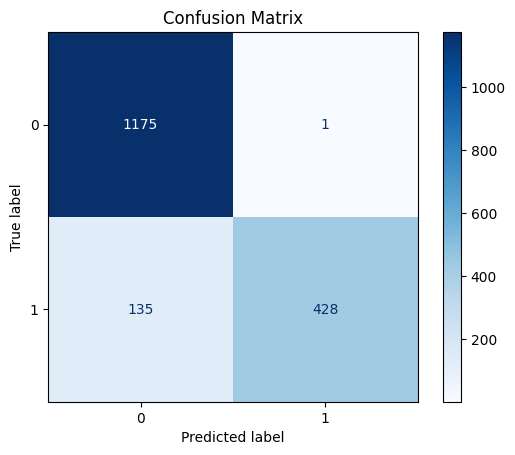

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(precision_score(y_test, preds))

0.9976689976689976
